In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
# Ruta del archivo Excel
ruta_archivo = '/content/consolidado_motores.xlsx'

# Cargar el archivo Excel en un DataFrame
consolidado = pd.read_excel(ruta_archivo, sheet_name='Consolidado')

In [4]:
# Filtrar el DataFrame para obtener solo los motores con voltaje entre 550 y 585
consolidado2 = consolidado[(consolidado['SEG_VOLT'] == "BAJO VOLTAJE 2(550-585)")]

In [5]:
motores_unicos1 = consolidado2.drop_duplicates(subset=['MARCA ', 'R.P.M', 'POTENCIA (HP)', 'FRAME','Polos'])

<ipython-input-6-08c557fdf78b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  motores_unicos1['Power Range'] = pd.cut(motores_unicos1['POTENCIA (HP)'], bins=bins, labels=labels)
<ipython-input-6-08c557fdf78b>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pivot_table = motores_unicos1.groupby(['Power Range', 'Polos']).size().unstack()


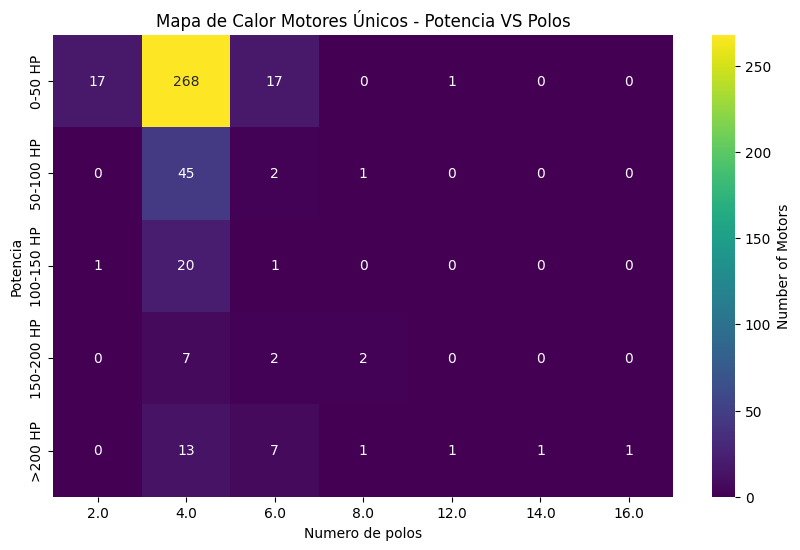

In [6]:
# Create bins for power ranges
bins = [0, 50, 100, 150, 200, float('inf')]  # Adjust bins as needed
labels = ['0-50 HP', '50-100 HP', '100-150 HP', '150-200 HP', '>200 HP']
motores_unicos1['Power Range'] = pd.cut(motores_unicos1['POTENCIA (HP)'], bins=bins, labels=labels)

# Create a pivot table to count motors by power range and poles
pivot_table = motores_unicos1.groupby(['Power Range', 'Polos']).size().unstack()

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='viridis', cbar_kws={'label': 'Number of Motors'})
plt.title('Mapa de Calor Motores Únicos - Potencia VS Polos')
plt.xlabel('Numero de polos')
plt.ylabel('Potencia')
plt.show()

SELECCIÓN DE SEGMENTO CRITICO: MOTORES OBJETIVOS

In [7]:
motores_objetivos = consolidado2[
    (consolidado['POTENCIA (HP)'] <= 100) &
    (consolidado['Polos'] == 4) ]

print(len(motores_objetivos))

700


<ipython-input-7-6f6264c63c5b>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  motores_objetivos = consolidado2[


In [8]:
print(f"Total de motores objetivos : {len(motores_objetivos)}")
print(f"Total de motores objetivos con características repetidas(unicos): {sum(len(grupo) >= 1 for _, grupo in motores_objetivos.groupby(['MARCA ', 'R.P.M', 'POTENCIA (HP)', 'FRAME']))}")


Total de motores objetivos : 700
Total de motores objetivos con características repetidas(unicos): 313


In [9]:
#DATA MOTORES UNICOS
motores_unicos = motores_objetivos.drop_duplicates(subset=['MARCA ', 'R.P.M', 'POTENCIA (HP)', 'FRAME','Polos'])
print(f"Cantidad de motores objetivos unicos: {len(motores_unicos)}")

Cantidad de motores objetivos unicos: 313
